In [ ]:
# pip install joypy - initial joypy install

In [1]:
# import libraries
import joypy, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
%matplotlib inline

In [3]:
# make DataFrame from one of the 2 data files
first_dataset = 'data/movies_2010_to_2014_data.csv'
first_df = pd.read_csv(first_dataset)

In [3]:
# check the result
first_df.head()

,Unnamed: 0,name,rating,genre,gross,release_year
0,1,Toy Story 3,G,"Animation, Adventure, Comedy",415.00,2010
1,2,Alice in Wonderland,PG,"Adventure, Family, Fantasy",334.19,2010
2,3,Iron Man 2,PG-13,"Action, Adventure, Sci-Fi",312.43,2010
3,4,The Twilight Saga: Eclipse,PG-13,"Action, Adventure, Crime",300.53,2010
4,5,Harry Potter and the Deathly Hallows: Part 1,PG-13,"Adventure, Family, Fantasy",295.98,2010


In [4]:
# get column names for DataFrame
first_df.columns

Index(['Unnamed: 0', 'name', 'rating', 'genre', 'gross', 'release_year'], dtype='object')

In [4]:
# rename first column to 'ry_rank' (for release year rank)
first_df.columns = ['ry_rank', 'name', 'rating', 'genre', 'gross', 'release_year']
first_df.columns

Index(['ry_rank', 'name', 'rating', 'genre', 'gross', 'release_year'], dtype='object')

In [5]:
# check the results
first_df.head()

,ry_rank,name,rating,genre,gross,release_year
0,1,Toy Story 3,G,"Animation, Adventure, Comedy",415.00,2010
1,2,Alice in Wonderland,PG,"Adventure, Family, Fantasy",334.19,2010
2,3,Iron Man 2,PG-13,"Action, Adventure, Sci-Fi",312.43,2010
3,4,The Twilight Saga: Eclipse,PG-13,"Action, Adventure, Crime",300.53,2010
4,5,Harry Potter and the Deathly Hallows: Part 1,PG-13,"Adventure, Family, Fantasy",295.98,2010


In [6]:
# make another DataFrame from the other data file and check the results
second_dataset = 'data/moviedf15_19data.csv'
second_df = pd.read_csv(second_dataset)
second_df.head()

,Unnamed: 0,name,genre,gross,rating,release_year
0,0,Star Wars: Episode VII - The Force Awakens,"Action, Adventure, Sci-Fi",936.66,PG-13,2015
1,1,Jurassic World,"Action, Adventure, Sci-Fi",652.27,PG-13,2015
2,2,Avengers: Age of Ultron,"Action, Adventure, Sci-Fi",459.01,PG-13,2015
3,3,Inside Out,"Animation, Adventure, Comedy",356.46,PG,2015
4,4,Furious 7,"Action, Adventure, Thriller",353.01,PG-13,2015


In [8]:
# get the column names of the new DataFrame
second_df.columns

Index(['Unnamed: 0', 'name', 'genre', 'gross', 'rating', 'release_year'], dtype='object')

In [7]:
# rename the first column
second_df.columns = ['ry_rank', 'name', 'genre', 'gross', 'rating', 'release_year']

In [8]:
# check the results
second_df.head()

,ry_rank,name,genre,gross,rating,release_year
0,0,Star Wars: Episode VII - The Force Awakens,"Action, Adventure, Sci-Fi",936.66,PG-13,2015
1,1,Jurassic World,"Action, Adventure, Sci-Fi",652.27,PG-13,2015
2,2,Avengers: Age of Ultron,"Action, Adventure, Sci-Fi",459.01,PG-13,2015
3,3,Inside Out,"Animation, Adventure, Comedy",356.46,PG,2015
4,4,Furious 7,"Action, Adventure, Thriller",353.01,PG-13,2015


In [9]:
# pop the 'rating' column from the new DataFrame to move it
second_rating = second_df.pop('rating')

In [10]:
# insert the 'rating' column in the desired position to align the columns of the two DataFrames
second_df.insert(2, 'rating', second_rating)

In [11]:
# check the second DataFrame column alignment
second_df.head()

,ry_rank,name,rating,genre,gross,release_year
0,0,Star Wars: Episode VII - The Force Awakens,PG-13,"Action, Adventure, Sci-Fi",936.66,2015
1,1,Jurassic World,PG-13,"Action, Adventure, Sci-Fi",652.27,2015
2,2,Avengers: Age of Ultron,PG-13,"Action, Adventure, Sci-Fi",459.01,2015
3,3,Inside Out,PG,"Animation, Adventure, Comedy",356.46,2015
4,4,Furious 7,PG-13,"Action, Adventure, Thriller",353.01,2015


In [14]:
# check the first DataFrame column alignment
first_df.head()

,ry_rank,name,rating,genre,gross,release_year
0,1,Toy Story 3,G,"Animation, Adventure, Comedy",415.00,2010
1,2,Alice in Wonderland,PG,"Adventure, Family, Fantasy",334.19,2010
2,3,Iron Man 2,PG-13,"Action, Adventure, Sci-Fi",312.43,2010
3,4,The Twilight Saga: Eclipse,PG-13,"Action, Adventure, Crime",300.53,2010
4,5,Harry Potter and the Deathly Hallows: Part 1,PG-13,"Adventure, Family, Fantasy",295.98,2010


In [12]:
# combine the first and second DataFrames into a new DataFrame 'full_df'
full_df = pd.concat([first_df, second_df])

In [13]:
# check the results
full_df.head()

,ry_rank,name,rating,genre,gross,release_year
0,1,Toy Story 3,G,"Animation, Adventure, Comedy",415.00,2010
1,2,Alice in Wonderland,PG,"Adventure, Family, Fantasy",334.19,2010
2,3,Iron Man 2,PG-13,"Action, Adventure, Sci-Fi",312.43,2010
3,4,The Twilight Saga: Eclipse,PG-13,"Action, Adventure, Crime",300.53,2010
4,5,Harry Potter and the Deathly Hallows: Part 1,PG-13,"Adventure, Family, Fantasy",295.98,2010


In [14]:
# another results check
full_df.tail()

,ry_rank,name,rating,genre,gross,release_year
245,45,Maleficent: Mistress of Evil,PG,"Adventure, Family, Fantasy",36.95,2019
246,46,The Intruder,PG-13,"Drama, Horror, Mystery",35.42,2019
247,47,The Hustle,PG-13,"Comedy, Crime",35.42,2019
248,48,Ad Astra,PG-13,"Adventure, Drama, Mystery",35.40,2019
249,49,Cold Pursuit,R,"Action, Crime, Drama",32.14,2019


In [65]:
# find primary_genre, identified as first element of genre info
list(full_df['genre'])[0].split(', ')[0]

'Animation'

In [15]:
# make list of primary_genre info
primary_genre = [genre.split(', ')[0] for genre in full_df['genre']]

In [20]:
# check the results
primary_genre

['Animation',
 'Adventure',
 'Action',
 'Action',
 'Adventure',
 'Action',
 'Animation',
 'Animation',
 'Animation',
 'Animation',
 'Action',
 'Action',
 'Drama',
 'Action',
 'Comedy',
 'Animation',
 'Comedy',
 'Biography',
 'Action',
 'Mystery',
 'Action',
 'Action',
 'Documentary',
 'Comedy',
 'Drama',
 'Action',
 'Adventure',
 'Action',
 'Comedy',
 'Animation',
 'Comedy',
 'Biography',
 'Comedy',
 'Action',
 'Biography',
 'Crime',
 'Action',
 'Action',
 'Adventure',
 'Horror',
 'Action',
 'Drama',
 'Drama',
 'Action',
 'Action',
 'Comedy',
 'Action',
 'Action',
 'Comedy',
 'Action',
 'Adventure',
 'Action',
 'Action',
 'Comedy',
 'Action',
 'Action',
 'Action',
 'Animation',
 'Action',
 'Action',
 'Action',
 'Action',
 'Drama',
 'Comedy',
 'Animation',
 'Animation',
 'Action',
 'Animation',
 'Animation',
 'Animation',
 'Mystery',
 'Animation',
 'Comedy',
 'Action',
 'Animation',
 'Horror',
 'Comedy',
 'Crime',
 'Comedy',
 'Action',
 'Animation',
 'Action',
 'Adventure',
 'Action',
 

In [16]:
# add new column for primary_genre to DataFrame
full_df['primary_genre'] = primary_genre

In [17]:
# check the results
full_df.tail()

,ry_rank,name,rating,genre,gross,release_year,primary_genre
245,45,Maleficent: Mistress of Evil,PG,"Adventure, Family, Fantasy",36.95,2019,Adventure
246,46,The Intruder,PG-13,"Drama, Horror, Mystery",35.42,2019,Drama
247,47,The Hustle,PG-13,"Comedy, Crime",35.42,2019,Comedy
248,48,Ad Astra,PG-13,"Adventure, Drama, Mystery",35.40,2019,Adventure
249,49,Cold Pursuit,R,"Action, Crime, Drama",32.14,2019,Action


In [78]:
# export combined data to csv file
full_df.to_csv(path_or_buf='data/combined_movie_data_2010_to_2019.csv')

In [235]:
full_df = pd.read_csv('data/combined_movie_data_2010_to_2019.csv')

In [239]:
genre_gross_df = full_df.groupby('primary_genre')['gross'].sum().sort_values(ascending=False)

Text(0.5, 1.0, 'Box Office Gross by Movie Genre 2010-2019')

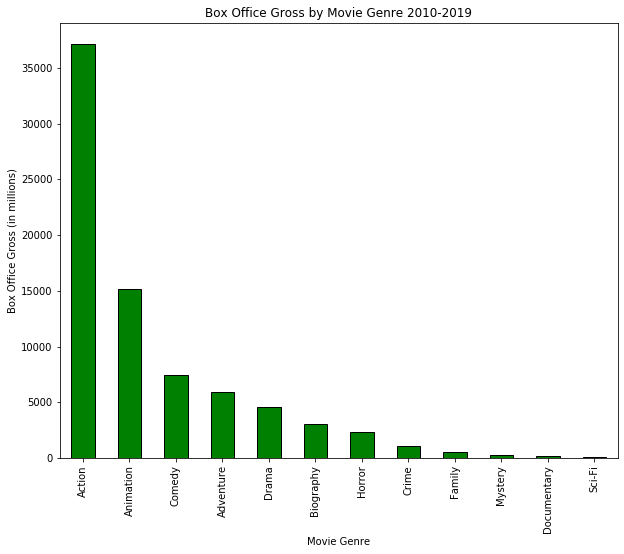

In [258]:
genre_gross_df.plot(kind='bar',
                    figsize=(10,8),
                    color='green',
                   edgecolor='black');
plt.xlabel('Movie Genre');
plt.ylabel('Box Office Gross (in millions)');
plt.title('Box Office Gross by Movie Genre 2010-2019');

In [260]:
plt.savefig(fname='images/gross_by_genre.png', format='png')

<Figure size 432x288 with 0 Axes>

In [241]:
rating_gross_df = full_df.groupby('rating')['gross'].sum().sort_values(ascending=False)

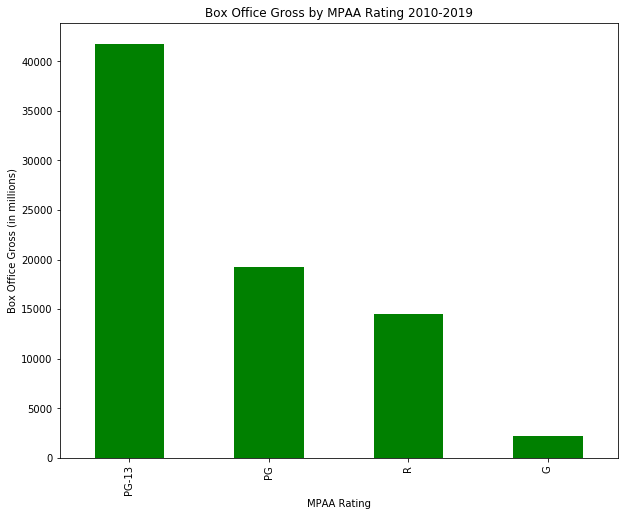

In [242]:
rating_gross_df.plot(kind='bar',
                    figsize=(10,8),
                    color='green');
plt.title('Box Office Gross by MPAA Rating 2010-2019');
plt.xlabel('MPAA Rating');
plt.ylabel('Box Office Gross (in millions)');

In [243]:
genre_rating_gross_df = full_df.groupby(['primary_genre', 'rating'])['gross'].sum().sort_values(ascending=False)

In [244]:
genre_rating_gross_df

primary_genre  rating
Action         PG-13     30652.87
Animation      PG        12955.16
Action         R          5235.29
Comedy         R          3460.09
               PG-13      3322.81
Adventure      PG         2747.59
               PG-13      2718.47
Drama          PG-13      2586.78
Animation      G          2099.29
Horror         R          1873.04
Biography      PG-13      1528.53
Drama          R          1417.04
Action         PG         1273.45
Biography      R           942.97
Crime          R           805.98
Comedy         PG          697.83
Biography      PG          559.58
Drama          PG          547.51
Family         PG          504.01
Horror         PG-13       489.21
Adventure      R           433.45
Crime          PG-13       277.57
Mystery        R           128.01
               PG-13       127.00
Documentary    R           117.22
Animation      R            97.69
Sci-Fi         PG-13        79.25
Documentary    G            73.01
Name: gross, dtype: float6

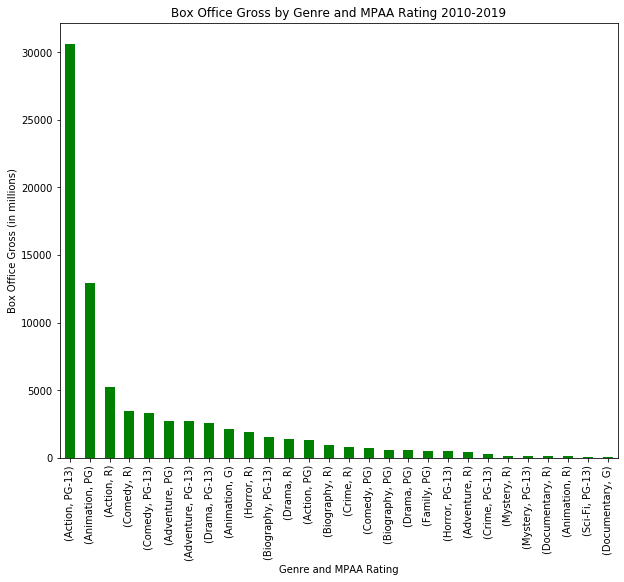

In [245]:
genre_rating_gross_df.plot(kind='bar',
                          figsize=(10,8),
                          color='green');
plt.title('Box Office Gross by Genre and MPAA Rating 2010-2019')
plt.xlabel('Genre and MPAA Rating')
plt.ylabel('Box Office Gross (in millions)');

In [246]:
genre_rating_count_df = full_df.groupby(['primary_genre', 'rating'])['name'].count().sort_values(ascending=False)

In [247]:
genre_rating_count_df

primary_genre  rating
Action         PG-13     148
Animation      PG         70
Action         R          44
Comedy         PG-13      34
               R          32
Drama          PG-13      24
Adventure      PG         21
Horror         R          16
Biography      PG-13      14
Adventure      PG-13      12
Animation      G          10
Action         PG         10
Drama          R          10
Biography      R           9
Comedy         PG          8
Crime          R           7
Horror         PG-13       6
Biography      PG          5
Drama          PG          5
Adventure      R           5
Crime          PG-13       3
Mystery        R           1
Documentary    G           1
Animation      R           1
Documentary    R           1
Family         PG          1
Mystery        PG-13       1
Sci-Fi         PG-13       1
Name: name, dtype: int64

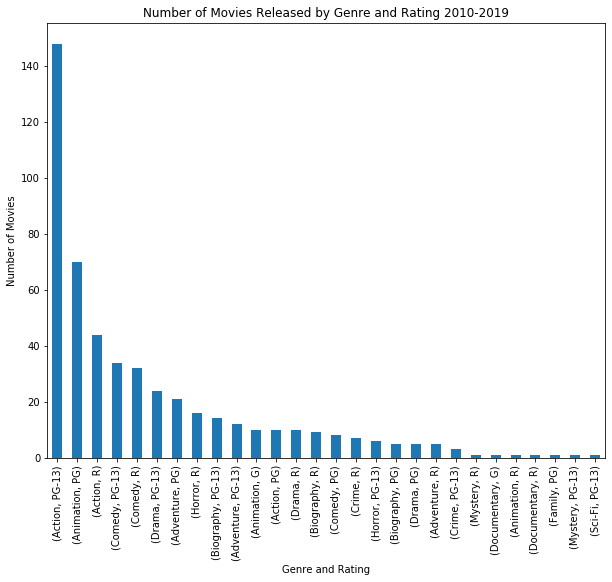

In [248]:
genre_rating_count_df.plot(kind='bar',
                           figsize=(10,8),
                          title='Number of Movies by Genre and Rating 2010-2019');
plt.title('Number of Movies Released by Genre and Rating 2010-2019')
plt.xlabel('Genre and Rating')
plt.ylabel('Number of Movies');

In [249]:
full_df.loc[full_df['primary_genre']=='Family']

,Unnamed: 0,ry_rank,name,rating,genre,gross,release_year,primary_genre
351,101,1,Beauty and the Beast,PG,"Family, Fantasy, Musical",504.01,2017,Family


In [250]:
full_df.groupby(['primary_genre', 'rating']).size()

primary_genre  rating
Action         PG         10
               PG-13     148
               R          44
Adventure      PG         21
               PG-13      12
               R           5
Animation      G          10
               PG         70
               R           1
Biography      PG          5
               PG-13      14
               R           9
Comedy         PG          8
               PG-13      34
               R          32
Crime          PG-13       3
               R           7
Documentary    G           1
               R           1
Drama          PG          5
               PG-13      24
               R          10
Family         PG          1
Horror         PG-13       6
               R          16
Mystery        PG-13       1
               R           1
Sci-Fi         PG-13       1
dtype: int64

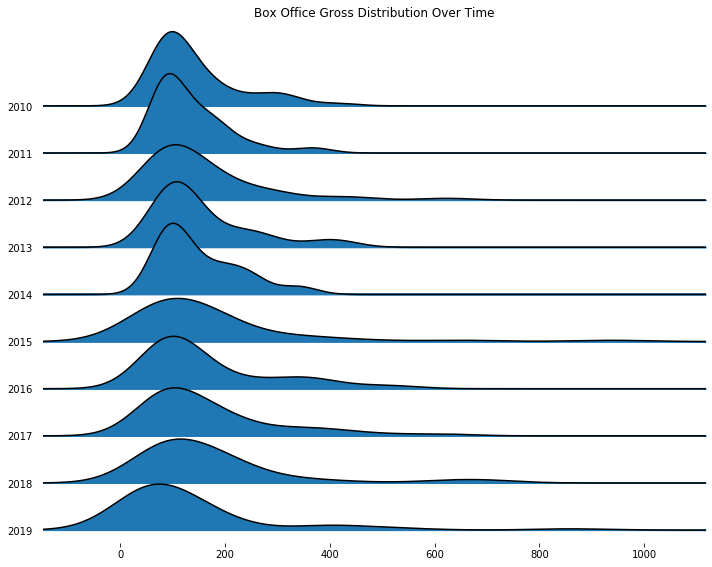

In [251]:
joypy.joyplot(data=full_df, by='release_year', column='gross', figsize=(10,8), title='Box Office Gross Distribution Over Time');

In [252]:
full_df.groupby('primary_genre')['gross'].median()

primary_genre
Action         130.870
Adventure      114.260
Animation      160.800
Biography       95.685
Comedy          86.975
Crime          102.675
Documentary     95.115
Drama          106.950
Family         504.010
Horror          84.510
Mystery        127.505
Sci-Fi          79.250
Name: gross, dtype: float64

In [253]:
df_recent = full_df.loc[full_df['release_year']==2018|2019]

In [254]:
df_recent.groupby('primary_genre')['gross'].median()

primary_genre
Action       110.500
Adventure     54.890
Animation    158.140
Biography     68.540
Comedy        63.935
Crime        192.730
Drama         78.385
Horror        58.735
Name: gross, dtype: float64